In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', weight='normal')

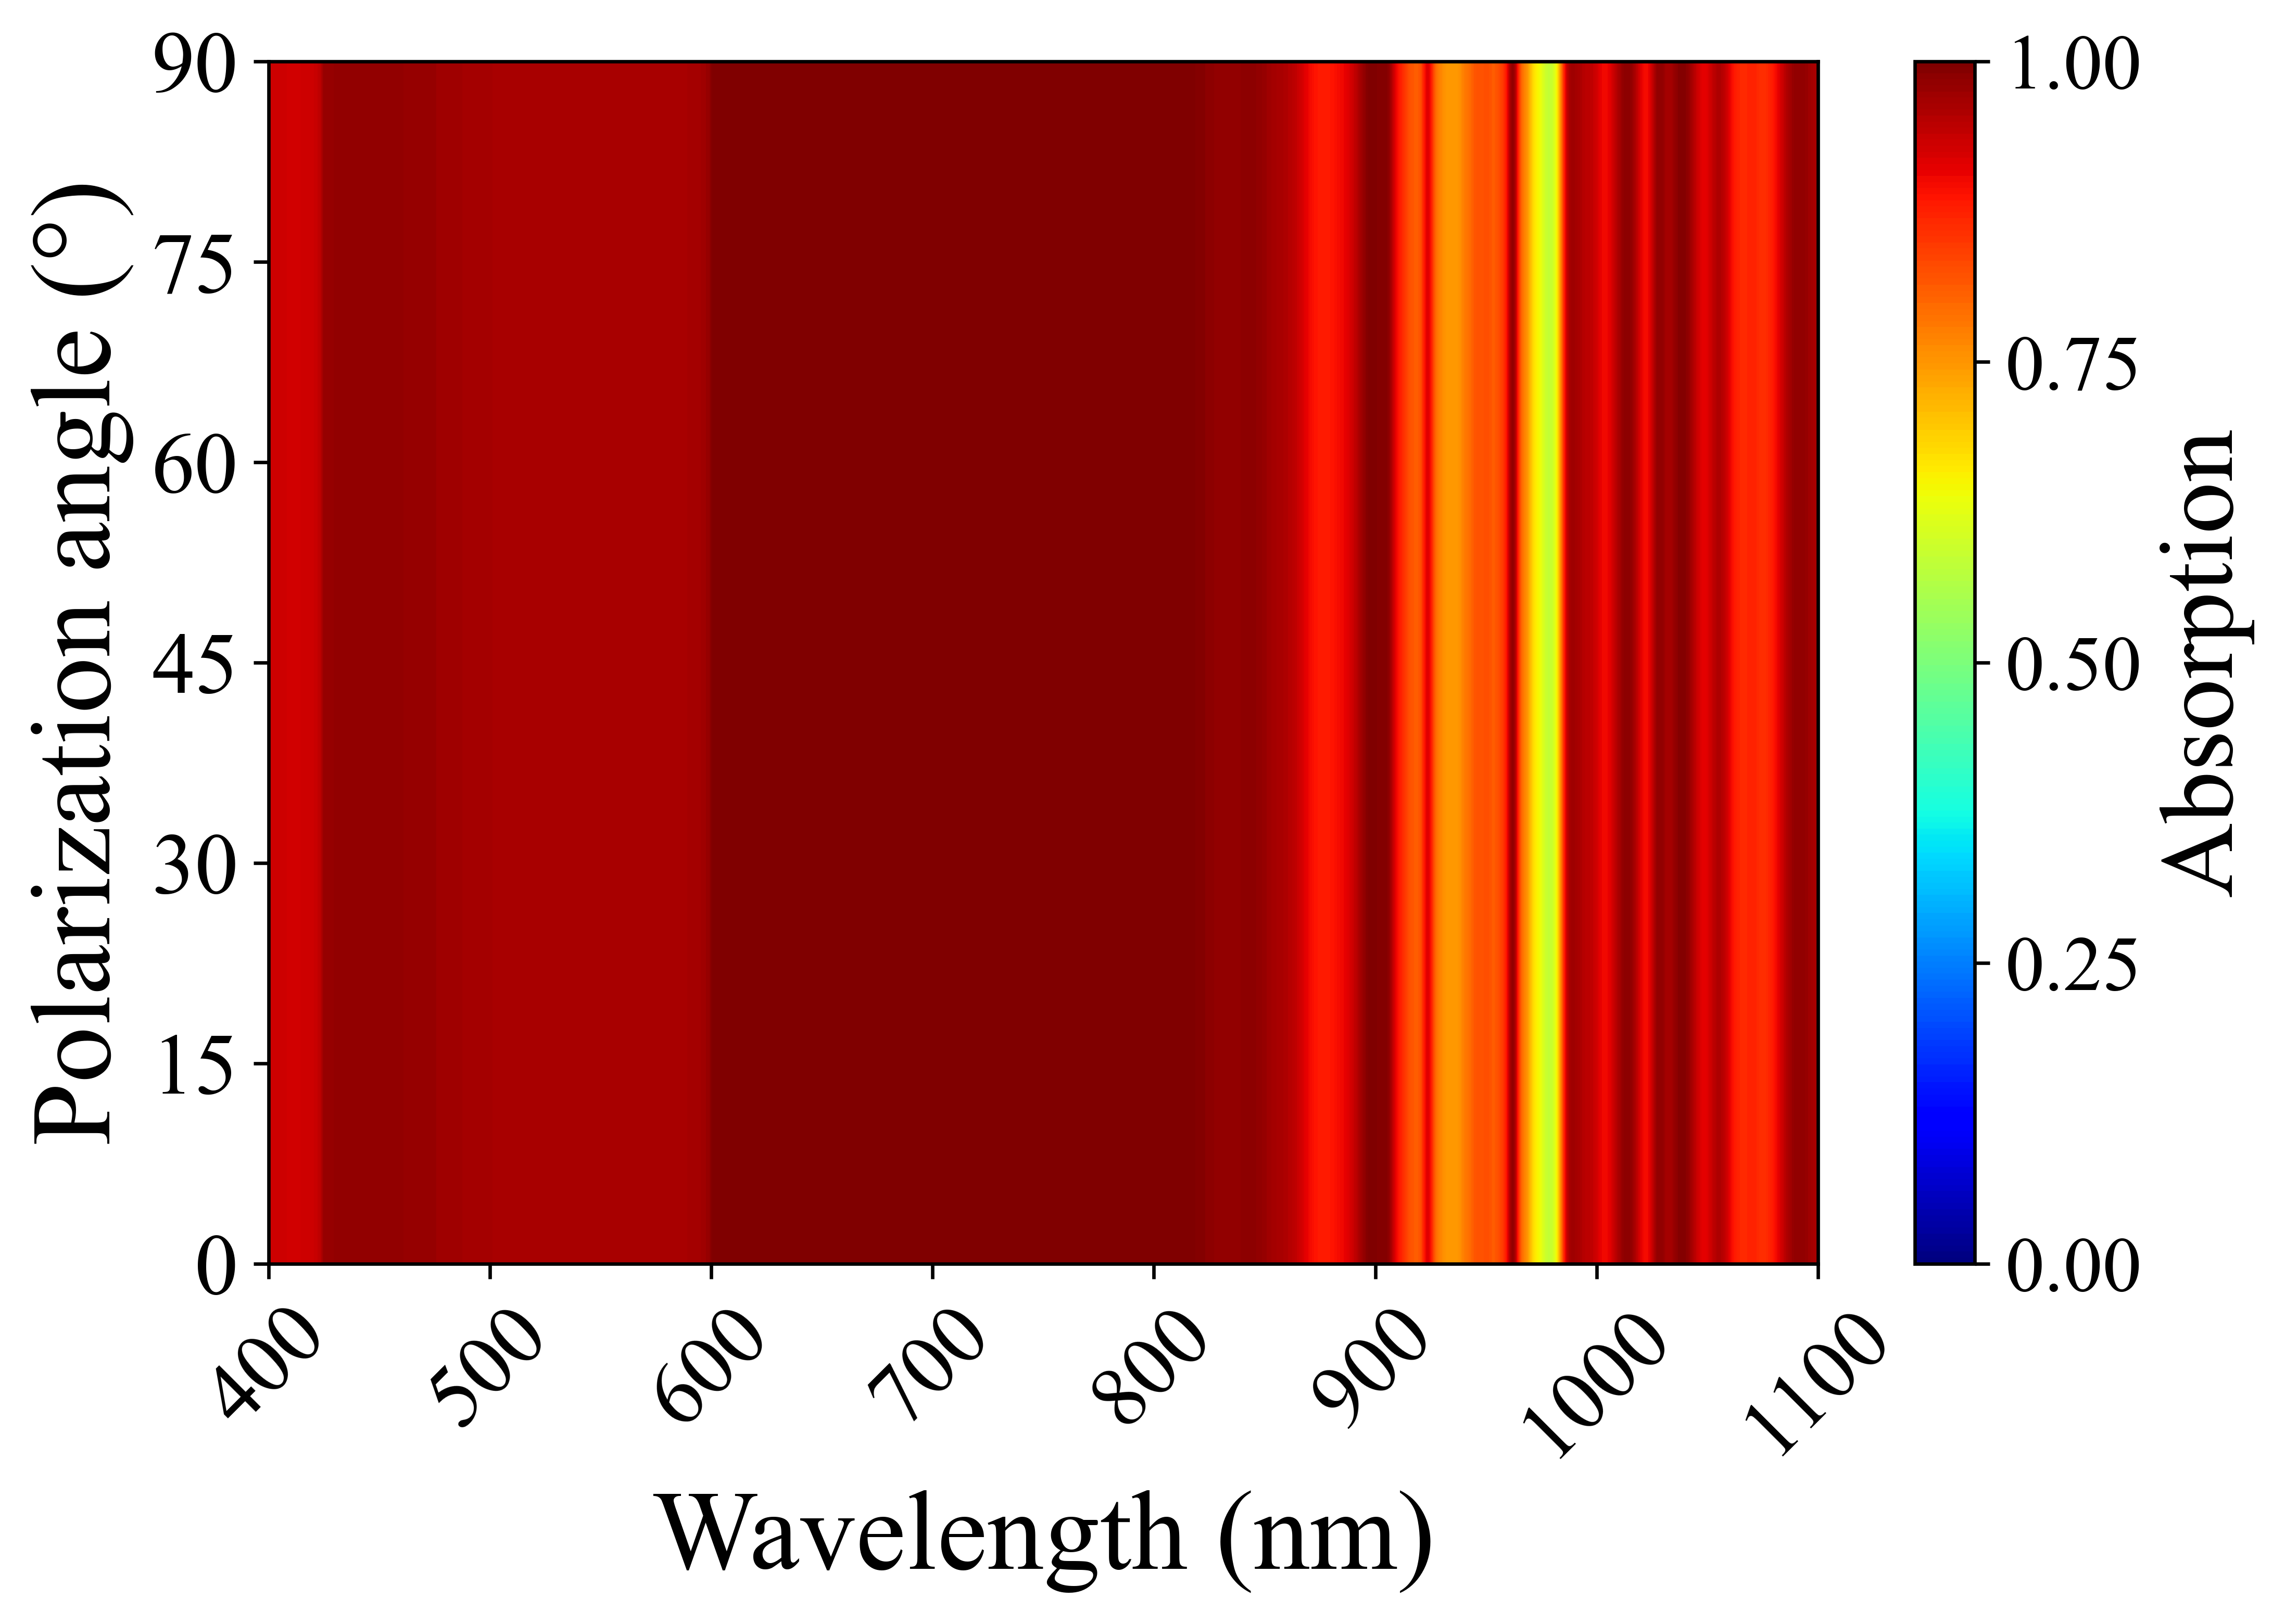

In [2]:

# Open the MAT file
mat_file = h5py.File('pol_angle.mat')

# Process the data
f = mat_file['f'][:]
lightspeed = 299792458  # m/s
wavelength = (lightspeed * 1e9) / f
w = wavelength.T
w = w.flatten()

x = w.tolist()
y = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

X, Y = np.meshgrid(x, y)

a0 = mat_file['A_0'][:].T.flatten().tolist()
a10 = mat_file['A_10'][:].T.flatten().tolist()
a20 = mat_file['A_20'][:].T.flatten().tolist()
a30 = mat_file['A_30'][:].T.flatten().tolist()
a40 = mat_file['A_40'][:].T.flatten().tolist()
a50 = mat_file['A_50'][:].T.flatten().tolist()
a60 = mat_file['A_60'][:].T.flatten().tolist()
a70 = mat_file['A_70'][:].T.flatten().tolist()
a80 = mat_file['A_80'][:].T.flatten().tolist()
a90 = mat_file['A_90'][:].T.flatten().tolist()

Z = np.array([a0, a10, a20, a30, a40, a50, a60, a70, a80, a90])

# Set the colorbar range
vmin = 0
vmax = 1

# Normalize Z to be within the range [0, 1]
Z_normalized = (Z - vmin) / (vmax - vmin)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=600)

# Define the number of levels for the contour
num_levels = 200

# Create filled contours with vmin and vmax set to 0 and 1
cp = ax.contourf(X, Y, Z_normalized, levels=np.linspace(vmin, vmax, num_levels), cmap='jet', vmin=vmin, vmax=vmax)

# Add a colorbar with specified ticks
color_bar = fig.colorbar(cp)
color_bar.set_label('Absorption', weight='normal', fontsize=24)

# Set the colorbar range from 0 to 1 and define the ticks
num_ticks = 5
ticks = np.linspace(vmin, vmax, num_ticks)
color_bar.set_ticks(ticks)
color_bar.set_ticklabels([f"{tick:.2f}" for tick in ticks])

# Increase the size of the colorbar tick labels
color_bar.ax.tick_params(labelsize=18)

# Set the axis labels
ax.set_xlabel('Wavelength (nm)', fontsize=26, fontweight='normal')
ax.set_ylabel('Polarization angle (°)', fontsize=26, fontweight='normal')

# Customize tick appearance
plt.xticks(size=20, weight='normal', rotation=45)
# plt.yticks(size=14, weight='normal')

# Specify which y-ticks to show
y_ticks_to_show = [0, 15, 30, 45, 60, 75, 90]
ax.set_yticks(y_ticks_to_show)
ax.set_yticklabels([str(tick) for tick in y_ticks_to_show], size=20, weight='normal')

plt.savefig('pol_angle.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()
